<a href="https://colab.research.google.com/github/ChloeShujunYang/JSC270_HW2_2024_-syang-./blob/main/JSC270_Assignment2_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [3]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

##Part2
##Initial data exploration
##Q1


In [4]:
column_data_types = income94.dtypes
column_data_types

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
gross_income_group    object
dtype: object

##Q2
Count the number of missing values in each column.

In [5]:
income94.replace(' ?', np.nan, inplace=True)
missing_values_count = income94.isnull().sum()

print(missing_values_count)

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


##Q3
Plot the distributions of capital_gain and capital_loss.

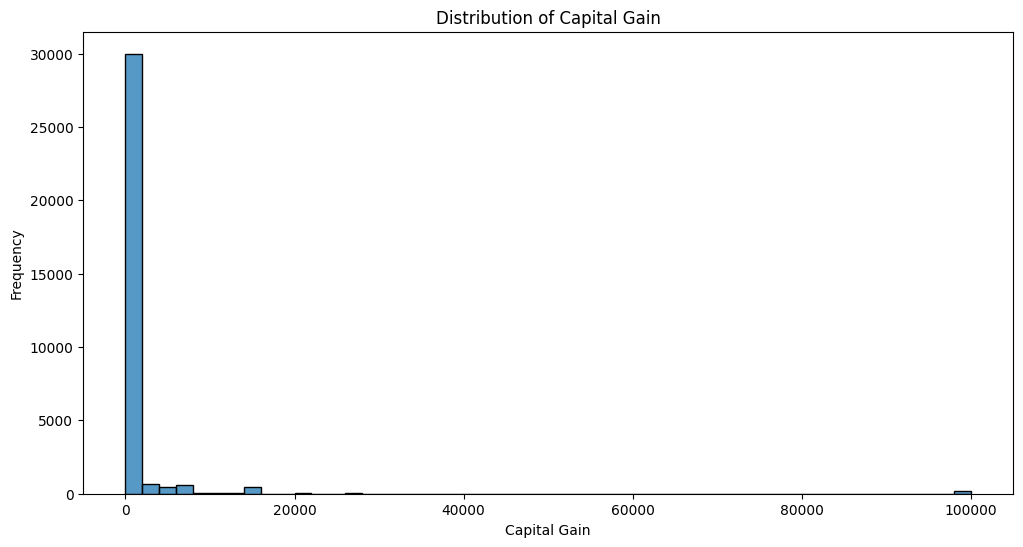

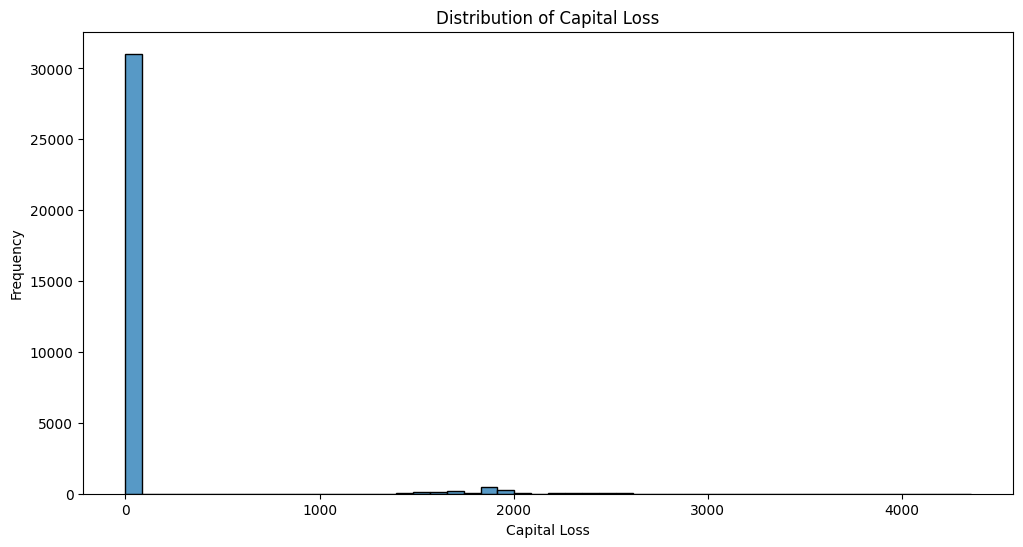

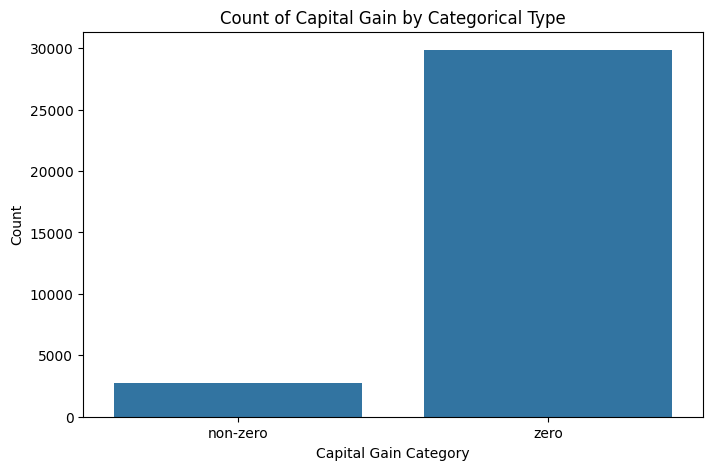

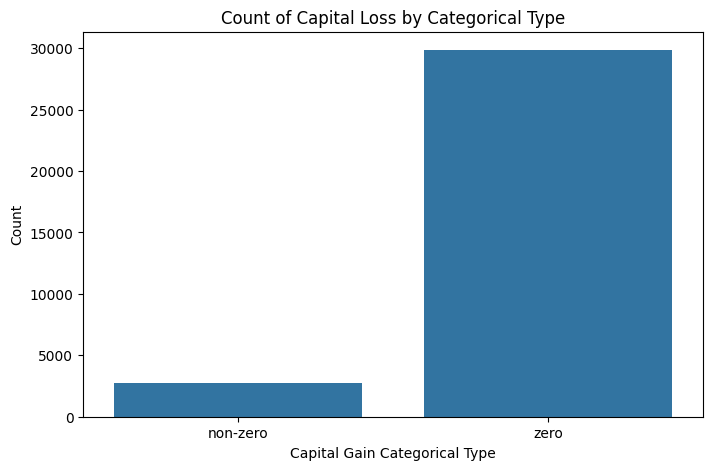

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(income94['capital_gain'], bins=50)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(income94['capital_loss'], bins=50)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()

income94['capital_gain_categorical_type'] = income94['capital_gain'].apply(lambda x: 'zero' if x == 0 else 'non-zero')
income94['capital_loss_categorical_type'] = income94['capital_loss'].apply(lambda x: 'zero' if x == 0 else 'non-zero')

plt.figure(figsize=(8, 5))
sns.countplot(x='capital_gain_categorical_type', data=income94)
plt.title('Count of Capital Gain by Categorical Type')
plt.xlabel('Capital Gain Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='capital_gain_categorical_type', data=income94)
plt.title('Count of Capital Loss by Categorical Type')
plt.xlabel('Capital Gain Categorical Type')
plt.ylabel('Count')
plt.show()


##Q4
##1.Plot the distribution of fnlwgt

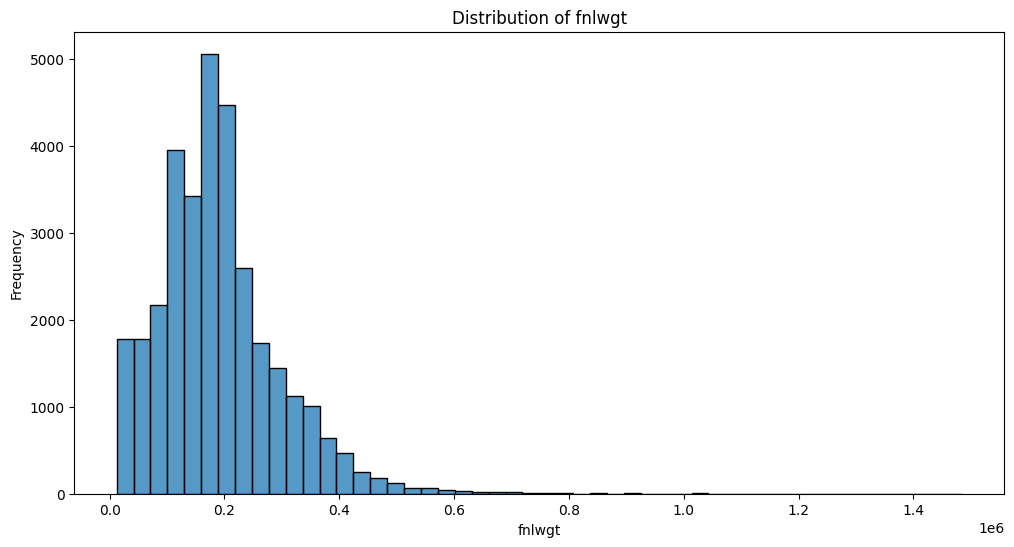

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(income94['fnlwgt'], bins=50)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()



##2.Plot the distribution of fnlwgt by gender


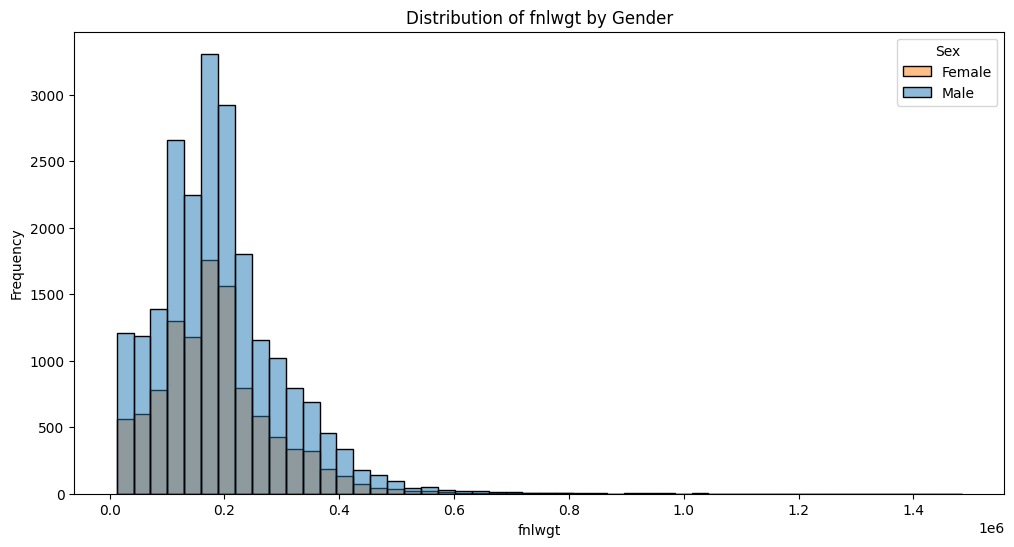

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data=income94, x='fnlwgt', hue='sex', bins=50)
plt.title('Distribution of fnlwgt by Gender')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.show()

##3.Set the fnlwgt values for outliers as missing.

In [9]:
Q1 = income94['fnlwgt'].quantile(0.25)
Q3 = income94['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
outliers = (income94['fnlwgt'] < Q1 - 1.5 * IQR) | (income94['fnlwgt'] > Q3 + 1.5 * IQR)

income94.loc[outliers, 'fnlwgt'] = np.nan

##Correlation
##1.Find the correlations between age, education_num, and hours_per_week.


In [10]:
correlation_matrix = income94[['age', 'education_num', 'hours_per_week']].corr()
print(correlation_matrix)


                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000


##b.Statistically test any variable pairs with a correlation coefficient > |0.1|.Here is education_num and hours_per_week from the last correlation matrix. Report the result.

In [11]:
stat, p = stats.pearsonr(income94['education_num'], income94['hours_per_week'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print("p_value < 0.05. correlation coefficient of education_num and hours_per_week is difference from 0")
else:
    print("p_value > 0.05. correlation coefficient of education_num and hours_per_week is not difference from 0.")

stat=0.148, p=0.000
p_value < 0.05. correlation coefficient of education_num and hours_per_week is difference from 0


##c. Correlation (and its significance) between education_num and age compare between male and female participants

In [12]:
male_data = income94[income94['sex'].str.strip().str.lower() == 'male']
female_data = income94[income94['sex'].str.strip().str.lower() == 'female']

corr_male, p_m = stats.pearsonr(male_data['education_num'], male_data['age'])
print('Male: stat=%.3f, p=%.3f' % (corr_male, p_m))
corr_female, p_f = stats.pearsonr(female_data['education_num'], female_data['age'])
print('Female: stat=%.3f, p=%.3f' % (corr_female, p_f))

Male: stat=0.060, p=0.000
Female: stat=-0.018, p=0.063


##d.Compute the covariance matrix for education_num and hours_per_week.

In [13]:
correlation_matrix = income94[['education_num', 'hours_per_week']].corr()
print(correlation_matrix)

                education_num  hours_per_week
education_num        1.000000        0.148123
hours_per_week       0.148123        1.000000


##Regression
##1.Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.


In [14]:
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:11:19   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

##b.Add education_num as a control variable

In [15]:
reg2 = smf.ols('hours_per_week ~ sex + education_num', data=income94).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:11:19   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

##c. Add gross_income_group as a binary variable in the model

In [21]:

income94['income_binary'] = (income94['gross_income_group'] == ' >50K').astype(int)

reg3 = smf.ols('hours_per_week ~ sex + education_num + income_binary', data=income94).fit()
print(reg3.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:24:41   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        31.4218      0.288    109.184